## Agenda


> Range Sum

> Equilibrium Index

> Range Sum - Odd/Even

**Class Question 1:** Given an array of size N. Find the sum of the elements from index s to e.

arr = [6, 2, 4, 5, 2, 8, -9, 3, 1]

Normal List Operation for the above question will take O(N) operation

**Follow up on Class Question 1:**

Instead of finding the sum for index s to e, we now to find the sum of the range of 'q' indexes - [e1, s1], [e2, s2], [e3, s3], ........ [eq, sq]

This will take O(N*q) operation

To **optimize or reduce the time complexity of class question 1**, we need to closely follow the concept of prefix sum, which could be understood from the below exercise

**Quiz1:** Given the scores of the last 10 overs of a cricket match:

288, 312, 330, 349, 360, 383, 394, 406, 436, 439

How many runs were scored in the last over?

**Ans:** 439-436 = 3

**Quiz2:** Given the scores of the last 10 overs of a cricket match:

288, 312, 330, 349, 360, 383, 394, 406, 436, 439

How many runs were scored in the 49th over (2nd last over) ?

**Ans:** 436 - 406 = 30

**Quiz3:** Given the scores of the last 10 overs of a cricket match:

288, 312, 330, 349, 360, 383, 394, 406, 436, 439

How many runs were scored in the last 5 overs?

**Ans:** 439 - 360

**Quiz4:** Given the scores of the last 10 overs of a cricket match :

288, 312, 330, 349, 360, 383, 394, 406, 436, 439

How many runs were scored from 42nd to 45th over (both included) ?

**Ans:** 360 - 288 = 72

The above concept of runs scored in a particular over in a cricket match can now be applied to the Class Question 1 by buidling a prefix sum array PS for arr = [6, 2, 4, 5, 2, 8, -9, 3, 1]

PS[0] = arr[0]

PS[1] = arr[0] + arr[1]

PS[2] = arr[0] + arr[1] + arr[2]

...

PS[n] = arr[0] + arr[1] + arr[2] + ... + arr[n-1] + arr[n]

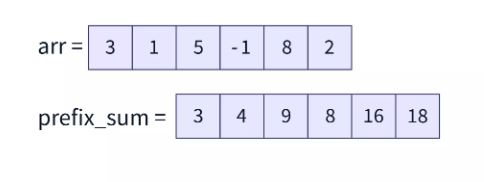

So to find sum of the indexes from 1 to 4, it is nothing but a[1] + a[2] + a[3]+ a[4],

which can now be achieved by prefix sum array very easily by the below operation -

PS[4] - PS[0] = a[0] + a[1] + a[2] + a[3] + a[4] - a[0]

              = a[1] + a[2] + a[3] + a[4]

So, in short to find the sum of the elements from index s to e, it is PS[e] - PS[s-1]

In [ ]:
# Prefix Sum from index S to E

arr = [6, 2, 4, 5, 2, 8, -9, 3, 1]

def PrefixSum(a,x,y):
  sum = 0
  PS = []
  for i in range(len(a)):
    sum += a[i]
    PS.append(sum)

  print(f'Prefix Sum Array: {PS}')

  if x == 0:
    return PS[y]
  else:
    return PS[y]-PS[x-1]
s1 = 1
e1 = 4
print(PrefixSum(arr,s1,e1))
s2 = 0
e2 = 4
print(PrefixSum(arr,s2,e2))

Prefix Sum Array: [6, 8, 12, 17, 19, 27, 18, 21, 22]
13
Prefix Sum Array: [6, 8, 12, 17, 19, 27, 18, 21, 22]
19


For the above problem, **T.C** -> O(N), **S.C** -> O(N)

In [ ]:
# Prefix Sum from index S1 to E1, S2 to E2, ...... Sq to Eq

arr = [6, 2, 4, 5, 2, 8, -9, 3, 1]

def PrefixSum(a, queries):
  #print(len(queries))
  sum = 0
  PS = []

  for i in range(len(a)):

    sum += a[i]
    PS.append(sum)

  print(f'Prefix Sum Array: {PS}')

  output_list = []

  for i in range(len(queries)):

    #print(queries[i][0])
    #print(queries[i][1])

    if queries[i][0] == 0:

      output_list.append(PS[queries[i][1]])

    else:

      output_list.append(PS[queries[i][1]] - PS[queries[i][0]])

    #print(output_list)

  return output_list


PrefixSum(arr,([1,3],[0,5],[3,7]))

Prefix Sum Array: [6, 8, 12, 17, 19, 27, 18, 21, 22]


[9, 27, 4]

For the above problem, **T.C** -> O(N), **S.C** -> O(N)

**Equilibrium Index**

**Q.** What is Equilibrium Index ?

**Ans:** For an array A having N elements if there exists an element with ith index such that,

A[0] + A[1] + ..... + A[i-1] = A[i+1] + A[i+2] + ...... + A[N-1],

then 'i' is the equilibrium index in the array A.

**For Example:** In the array [1, 2, 3, 4, 8, 10], 4th index is the equilibrium index, because sum of elements to the left of 8 is equal to the sum of elements to the right of 8 in the array.

Similarly in the array [-7, 1, 5, 2, -4, 3, 0], indexes 3 and 6 are the equilibrium indexes.

**Class Problem 2:** Given an array of N elements. Return 'True' if the array has an equilibrium index

**Hint:** Create a Prefix Sum and iterate over all elements of the Prefix Sum array and check if there exist an index 'i' such that PS[i-1] = PS[N-1] - PS[i]

In [ ]:
# Implementation

def EquilibriumIndex(a):

  sum = 0
  PS = []
  for i in range(len(a)):
    sum += a[i]
    PS.append(sum)

  print(f'Prefix Sum Array: {PS}')

  for i in range(len(PS)):

    if i == 0 and PS[len(PS)-1]-PS[i] == 0:
      
      return True

    elif i == len(PS)-1 and PS[len(PS)-2] == 0:

      return True

    elif PS[i-1] == PS[len(PS)-1] - PS[i]:

      return True

    else:

      continue

  return False

print(EquilibriumIndex([1, 2, 3, 4, 8, 10]))
print(EquilibriumIndex([-7, 1, 5, 2, -4, 3, 0]))
print(EquilibriumIndex([1, 2, 3, 4, 5, 6]))
print(EquilibriumIndex([1]))
print(EquilibriumIndex([1, 0]))
print(EquilibriumIndex([0, 1]))
print(EquilibriumIndex([5, 1, 2, 3, 4, -10]))
print(EquilibriumIndex([1, 2, 3, 4, -10, 6]))

Prefix Sum Array: [1, 3, 6, 10, 18, 28]
True
Prefix Sum Array: [-7, -6, -1, 1, -3, 0, 0]
True
Prefix Sum Array: [1, 3, 6, 10, 15, 21]
False
Prefix Sum Array: [1]
True
Prefix Sum Array: [1, 1]
True
Prefix Sum Array: [0, 1]
True
Prefix Sum Array: [5, 6, 8, 11, 15, 5]
True
Prefix Sum Array: [1, 3, 6, 10, 0, 6]
True


**Class Problem 3:** Given an array of N elements. Find -



a.   Sum of elements at even indexes in the array

b.   Sum of elements at odd indexes in the array



**Hint:** Create a separate prefix sum array for even indexed elements and odd indexed elements

In [ ]:
def OddEvenPrefixSum(a):

  sum_even = 0
  sum_odd = 0

  PSe = []
  PSo = []

  for i in range(0, len(a)):

    if i%2 == 0:

      sum_even += a[i]

    else:

      sum_odd += a[i]

    PSe.append(sum_even)
    PSo.append(sum_odd)

  print(f'Even Prefix Sum Array : {PSe}')
  print(f'Odd Prefix Sum Array  : {PSo}')


print(OddEvenPrefixSum([1, 2, 3, 4, 8, 10]))
print(OddEvenPrefixSum([-7, 1, 5, 2, -4, 3, 0]))
print(OddEvenPrefixSum([5]))
print(OddEvenPrefixSum([1, 0]))
      

Even Prefix Sum Array : [1, 1, 4, 4, 12, 12]
Odd Prefix Sum Array  : [0, 2, 2, 6, 6, 16]
None
Even Prefix Sum Array : [-7, -7, -2, -2, -6, -6, -6]
Odd Prefix Sum Array  : [0, 1, 1, 3, 3, 6, 6]
None
Even Prefix Sum Array : [5]
Odd Prefix Sum Array  : [0]
None
Even Prefix Sum Array : [1, 1]
Odd Prefix Sum Array  : [0, 0]
None


**Quiz5:** Construct the prefix sum for even indexed elements for the given array [2, 4, 3, 1, 5]

**Ans:** [2, 2, 5, 5, 10]

**Quiz6:** Construct the prefix sum for odd indexed elements for the given array: [2, 4, 3, 1, 5]

**Ans:** [0, 4, 4, 5, 5]